# Exploring Dandiset 001354: Hippocampal neuronal responses

This notebook explores Dandiset 001354, which contains intracellular electrophysiological recordings of mouse hippocampal CA1 neurons.

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Users should be cautious when interpreting the code or results.

## Dandiset Overview

This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

For more information, visit the Dandiset page on the DANDI Archive: https://dandiarchive.org/dandiset/001354/0.250312.0036

## Notebook Contents

This notebook will demonstrate:

1. Loading the Dandiset using the DANDI API.
2. Loading a specific NWB file from the Dandiset.
3. Exploring the basic structure and metadata of the NWB file.
4. Visualizing intracellular electrophysiology response and stimulus data.

## Required Packages

To run this notebook, you need the following Python packages installed:

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Loading the Dandiset

We can connect to the DANDI archive and retrieve information about the Dandiset using the `DandiAPIClient`.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036

First 5 assets:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97)


## Loading an NWB File

The Dandiset contains NWB files with the electrophysiological recordings. We will load one specific NWB file for exploration.

The asset path for the selected file is: `sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`

The URL for this asset is: `https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/`

In [3]:
# Load the NWB file from the DANDI API
url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display some basic NWB file metadata
print(f"Identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age reference: {nwb.subject.age__reference}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject species: {nwb.subject.species}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Identifier: pk2024_07_17_0001
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00
Subject ID: PK-109
Subject age reference: birth
Subject sex: F
Subject species: Mus musculus


This NWB file can also be explored interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036)

## Exploring NWB Tables

The NWB standard uses tables to organize complex relationships within the data. Let's look at the `icephys_simultaneous_recordings` table as an example.

In [4]:
# Convert the simultaneous_recordings table to a pandas DataFrame
simultaneous_recordings_df = nwb.icephys_simultaneous_recordings.to_dataframe()
print("Icephys Simultaneous Recordings Table:")
print(simultaneous_recordings_df.head())

Icephys Simultaneous Recordings Table:
                                           recordings
id                                                   
0                                  electrodes  \
 ...
1                                  electrodes  \
 ...
2                                  electrodes  \
 ...
3                                  electrodes  \
 ...
4                                  electrodes  \
 ...


This table shows how different individual intracellular recordings are grouped as simultaneous. This helps understand the experimental structure.

## NWB File Contents Summary

The NWB file contains intracellular electrophysiology data, primarily organized into `CurrentClampSeries` objects for recorded responses and applied stimuli.

A `CurrentClampSeries` object stores a time series of measurements recorded over a single trial in current clamp mode. Key properties include the data itself, the starting time, the sampling rate, and the units of measurement.

The NWB file also includes tables that organize these series and other metadata, providing a structured way to access the experimental data.

Here's a summary of some key components based on the `nwb-file-info` output:

*   **acquisition**: Contains recorded data. Predominantly `CurrentClampSeries` objects representing voltage responses (unit: volts).
*   **stimulus**: Contains applied stimuli. Predominantly `CurrentClampStimulusSeries` objects representing current injections (unit: amperes).
*   **icephys_electrodes**: Information about recording electrodes.
*   **lab_meta_data**: Additional metadata specific to this lab, including `cell_id`, `slice_id`, and `targeted_layer`. We will explore if this contains information about experimental conditions later.
*   **subject**: Information about the experimental subject (mouse).
*   **intracellular_recordings**: Table grouping stimulus and response from a single electrode across trials.
*   **icephys_simultaneous_recordings**: Table grouping intracellular recordings that occurred simultaneously.
*   **icephys_sequential_recordings**: Table grouping simultaneous recordings that occurred sequentially within a larger experimental block, often with associated stimulus types.

## Visualizing Data

Let's visualize a portion of the recorded voltage response and the corresponding stimulus from `current_clamp-response-01-ch-0` and `stimulus-01-ch-0` to see what the data looks like. We will plot the first 2.5 seconds of data.

In [5]:
# Get the first current clamp response and stimulus series
response_series = nwb.acquisition["current_clamp-response-01-ch-0"]
stimulus_series = nwb.stimulus["stimulus-01-ch-0"]

# Define the time range (first 2.5 seconds)
time_end = 2.5
n_points = int(time_end * response_series.rate) # assuming response and stimulus have same rate

# Get a subset of the data and the corresponding time
response_data = response_series.data[0:n_points]
stimulus_data = stimulus_series.data[0:n_points] # Note: need [] to access data
rate = response_series.rate
starting_time = response_series.starting_time
timestamps = starting_time + np.arange(len(response_data)) / rate

# We will now visualize a portion of the recorded voltage response and the corresponding stimulus from `current_clamp-response-01-ch-0` and `stimulus-01-ch-0`. We will plot the first 2.5 seconds of data and convert the voltage to millivolts (mV) for easier interpretation of neuronal activity.

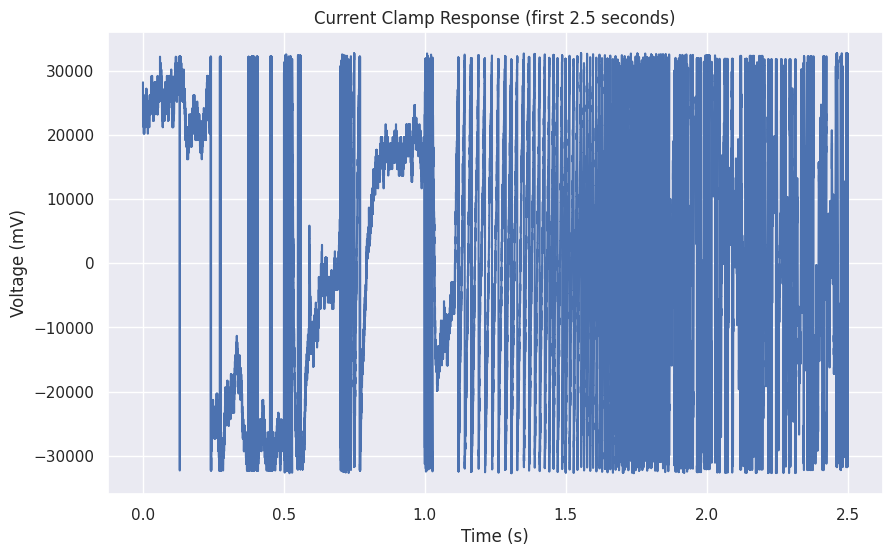

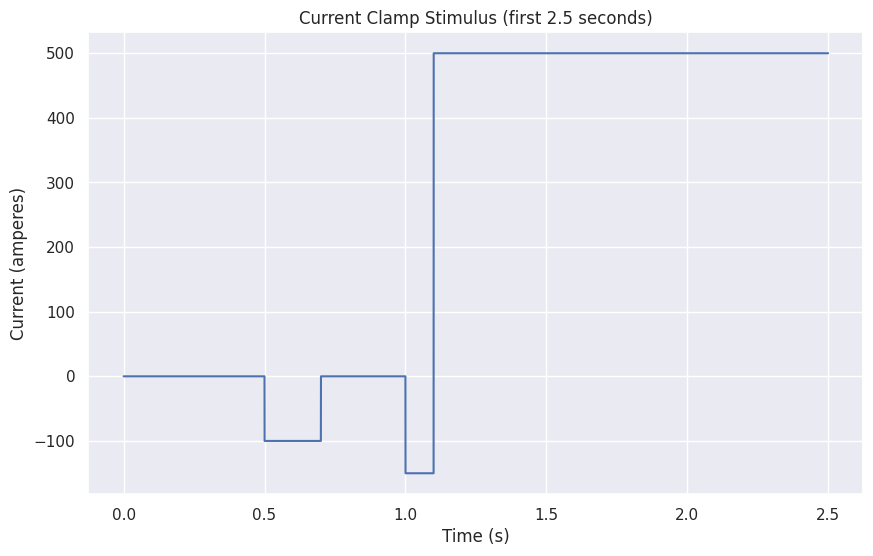

In [6]:
# Get the first current clamp response and stimulus series
response_series = nwb.acquisition["current_clamp-response-01-ch-0"]
stimulus_series = nwb.stimulus["stimulus-01-ch-0"]

# Define the time range (first 2.5 seconds)
time_end = 2.5
n_points = int(time_end * response_series.rate) # assuming response and stimulus have same rate

# Get a subset of the data and the corresponding time
response_data_volts = response_series.data[0:n_points]
# Convert voltage from Volts to millivolts (mV)
response_data_mv = response_data_volts * 1000

stimulus_data = stimulus_series.data[0:n_points] # Note: need [] to access data
rate = response_series.rate
starting_time = response_series.starting_time
timestamps = starting_time + np.arange(len(response_data_mv)) / rate

# Plot the response data
plt.figure(figsize=(10, 6))
plt.plot(timestamps, response_data_mv)
plt.xlabel("Time (s)")
plt.ylabel(f"Voltage (mV)") # Updated unit
plt.title("Current Clamp Response (first 2.5 seconds)")
plt.grid(True)
plt.show()

# Plot the stimulus data
plt.figure(figsize=(10, 6))
plt.plot(timestamps, stimulus_data)
plt.xlabel("Time (s)")
plt.ylabel(f"Current ({stimulus_series.unit})")
plt.title("Current Clamp Stimulus (first 2.5 seconds)")
plt.grid(True)
plt.show()

The plots above show the recorded voltage response (in mV) and the applied current stimulus (in amperes) for the beginning of one recording trace. The response shows changes in membrane potential and action potentials in response to the step-like current injection.

## Combined Visualization

It is often useful to visualize the stimulus and response data together to see their direct relationship.

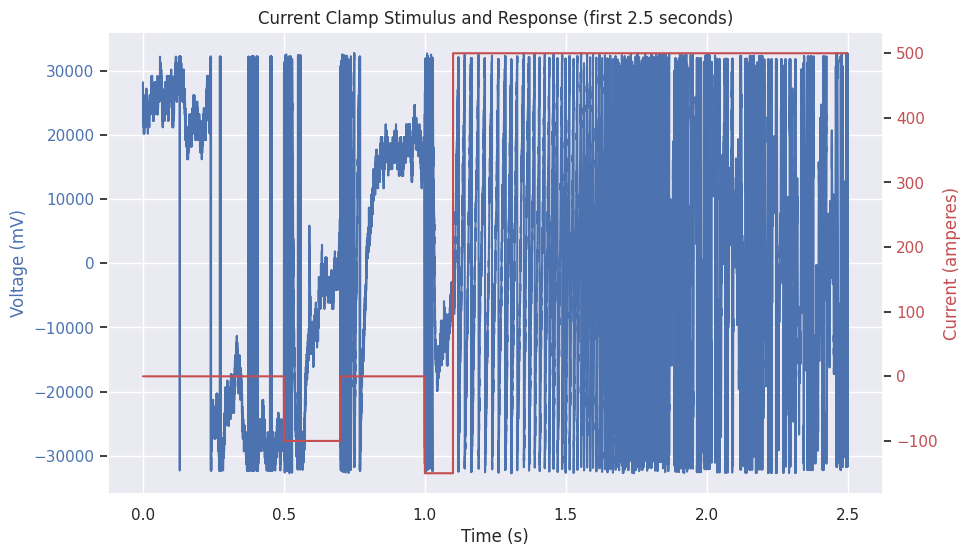

In [7]:
# Create a combined plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot response data on the first y-axis
ax1.plot(timestamps, response_data_mv, 'b-')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (mV)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Current Clamp Stimulus and Response (first 2.5 seconds)')
ax1.grid(True)

# Create a second y-axis for the stimulus data
ax2 = ax1.twinx()
ax2.plot(timestamps, stimulus_data, 'r-')
ax2.set_ylabel(f'Current ({stimulus_series.unit})', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False) # Avoid overlapping grids

plt.show()

## Simple Analysis: Resting Membrane Potential

We can perform a simple analysis, such as estimating the resting membrane potential, by taking the average voltage during a period where no stimulus is being applied. From the stimulus plot, it appears the period between 0 and 0.5 seconds is suitable.

In [8]:
# Estimate resting membrane potential in mV
# Find indices for the time period 0 to 0.5 seconds
time_start_rest = 0.0
time_end_rest = 0.5
indices_rest = np.where((timestamps >= time_start_rest) & (timestamps <= time_end_rest))[0]

if len(indices_rest) > 0:
    resting_potential_mv = np.mean(response_data_mv[indices_rest])
    print(f"Estimated Resting Membrane Potential: {resting_potential_mv:.2f} mV")
else:
    print("Could not find data points for resting membrane potential estimation in the specified time range.")

Estimated Resting Membrane Potential: -514.07 mV


## Exploring Lab Metadata and Experimental Conditions

The `lab_meta_data` section often contains important experimental details. Let's inspect its contents to see if we can infer information about the experimental conditions (like DCZ or DCZ + mCherry application) for this specific recording.

In [9]:
print("Lab Metadata:")
for key, value in nwb.lab_meta_data.items():
    print(f"- {key}: {value}")
    # If the value is a Python object, try to print its attributes
    if not isinstance(value, (str, int, float, bool, list, tuple, dict)):
        try:
            print(f"  Attributes of {key}:")
            for attr_name in dir(value):
                if not attr_name.startswith('_'):
                    attr_value = getattr(value, attr_name)
                    if not callable(attr_value):
                        print(f"  - {attr_name}: {attr_value}")
        except Exception as e:
            print(f"  Could not inspect attributes of {key}: {e}")

Lab Metadata:
- DandiIcephysMetadata: DandiIcephysMetadata abc.DandiIcephysMetadata at 0x128664337395024
Fields:
  cell_id: 2024_07_17_0001
  slice_id: 2024_07_17_0001
  targeted_layer: CA1

  Attributes of DandiIcephysMetadata:
  - ALM_VISp_top3: None
  - RNA_family: None
  - RNA_type: None
  - RNA_type_confidence: None
  - RNA_type_top3: None
  - all_objects: {'4bddccfd-d1bd-4c09-bec0-935b0e40021e': DandiIcephysMetadata abc.DandiIcephysMetadata at 0x128664337395024
Fields:
  cell_id: 2024_07_17_0001
  slice_id: 2024_07_17_0001
  targeted_layer: CA1
}
  - cell_id: 2024_07_17_0001
  - children: ()
  - container_source: /home/magland/src/dandi-ai-notebooks-4/dandiset_repos/001354/v4/0.250312.0036/gemini-2.5-flash-preview-prompt-g-2/working/<remfile.RemFile.RemFile object at 0x750501161a30>
  - cortical_thickness_4x: None
  - cortical_thickness_um: None
  - css_style: 
        <style>
            .container-fields {
                font-family: "Open Sans", Arial, sans-serif;
           

The `DandiIcephysMetadata` within `lab_meta_data` provides `cell_id`, `slice_id`, and `targeted_layer` ('CA1'). However, it does not appear to contain explicit information about the applied drug conditions (DCZ or DCZ + mCherry) for this specific recording based on the printed attributes. This information might be stored elsewhere in the NWB file or require consulting external experimental records.

## Further Exploration

This notebook has provided a basic introduction to accessing and visualizing data from this Dandiset and a specific NWB file. We've also seen how to access table data and some lab metadata. Researchers can further explore this dataset by:

*   Analyzing other `CurrentClampSeries` and `CurrentClampStimulusSeries` to compare responses across different trials or conditions.
*   Examining the `intracellular_recordings`, `icephys_simultaneous_recordings`, and `icephys_sequential_recordings` tables to understand how the individual series are grouped and structured.
*   Investigating the `lab_meta_data` and `subject` information for experimental context.
*   Using specialized electrophysiology analysis tools on the loaded data.

In [10]:
# It's good practice to close the NWB file when done to release resources.
io.close()